### 🌲 Random Forest (Balanced Data)

We applied **random oversampling** to balance the classes (`Extrovert` and `Introvert`) before training the model. This helps mitigate bias caused by class imbalance.

Key steps:

* Upsampled the minority class
* Trained `RandomForestClassifier` on balanced data
* Evaluated precision, recall, and F1-score


**Target encoding:**
- `0` = Extrovert
- `1` = Introvert


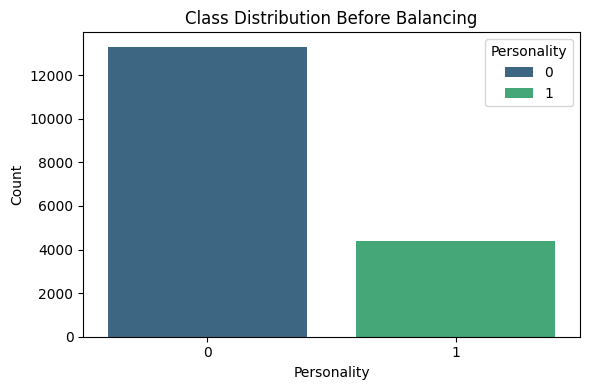

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load encoded training data
df = pd.read_csv("../data/prepared/train_fully_prepared.csv")

# Plot class distribution before balancing
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Personality", hue="Personality", palette="viridis")
plt.title("Class Distribution Before Balancing")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

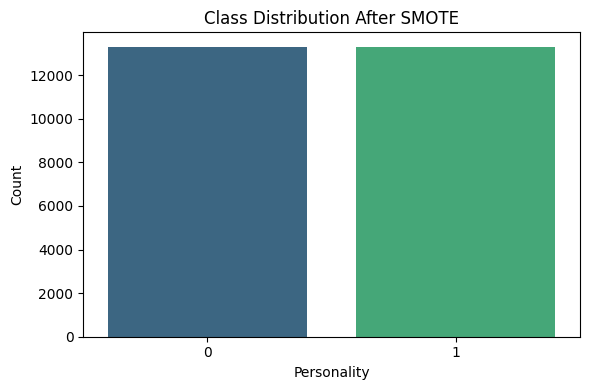

In [5]:
from imblearn.over_sampling import SMOTE


# Separate features and target
X = df.drop(columns=["id", "Personality"])
y = df["Personality"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Create balanced DataFrame
df_smote_balanced = X_smote.copy()
df_smote_balanced["Personality"] = y_smote

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_smote_balanced, x="Personality", hue="Personality", palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.legend().remove()
plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Target column: 0 = Extrovert, 1 = Introvert

# Split SMOTE-balanced data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42
)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_model.predict(X_val)

# Print classification report and confusion matrix
print(classification_report(y_val, y_pred, target_names=["Extrovert (0)", "Introvert (1)"]))
print(confusion_matrix(y_val, y_pred))


               precision    recall  f1-score   support

Extrovert (0)       0.93      0.98      0.95      2660
Introvert (1)       0.97      0.93      0.95      2659

     accuracy                           0.95      5319
    macro avg       0.95      0.95      0.95      5319
 weighted avg       0.95      0.95      0.95      5319

[[2595   65]
 [ 186 2473]]


In [7]:
# Load test data
test_df = pd.read_csv("../data/prepared/test_fully_prepared.csv")

# Save the id, return it later
test_ids = test_df["id"]

# Remove id before prediction
X_test = test_df.drop(columns=["id"])

# Predict with trained model
y_test_pred = rf_model.predict(X_test)

# Convert predictions back to labels
y_test_labels = pd.Series(y_test_pred).map({0: "Extrovert", 1: "Introvert"})

# Create submission DataFrame
submission = pd.DataFrame({
    "id": test_ids,
    "Personality": y_test_labels
})

# Save to CSV
submission.to_csv("submission.csv", index=False)